# Dataset: MTS Library
### https://www.kaggle.com/datasets/sharthz23/mts-library?select=users.csv

### Импорт необходимых библиотек

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Выгрузка данных

In [3]:
act = pd.read_csv(r'C:\Users\mvideo\Desktop\Статистика8\interactions.csv')
users = pd.read_csv(r'C:\Users\mvideo\Desktop\Статистика8\users.csv')

### Вектор из периодов
#### Всего 12 периодов, длина которых 2 месяца

In [21]:
start_date = np.array([])
stop_date = np.array([])
for i in range(2):
    for j in range(1, 13):
        if j % 2:
            if j != 11:
                start_date = np.append(start_date, f'201{8 + i}-0{j}-01')
            else:
                start_date = np.append(start_date, f'201{8 + i}-{j}-01')
        else:
            if j != 10 and j != 12:
                stop_date = np.append(stop_date, f'201{8 + i}-0{j}-31')
            else:
                stop_date = np.append(stop_date, f'201{8 + i}-{j}-31')

### Сравнение метрик в динамике происходит через индекс PSI
#### Все периоды сравниваются с эталонным 1 периодом

## Непрерывная метрика: Средний прогресс прочтения книги с 0% за 2 месяца
#### Вектор из долей средних значений прогресса в течение 2 месяцев относительно суммы всех средних (для расчета PSI)

In [22]:
sm_pross = np.array([])

for srt, stp in zip(start_date, stop_date):
    data = np.array(act[(act['start_date'] >= srt) & (act['start_date'] <= stp)]['progress'].dropna())
    sm_pross = np.append(sm_pross, data.mean())
    
sm_plot = sm_pross.copy()
sm_plot_z = np.array([list(sm_plot)[0] for i in range(12)])

sm_pross /= sm_pross.sum()
sm_pross = list(sm_pross)

### Распределение среднего прогресса прочтения книги по периодам

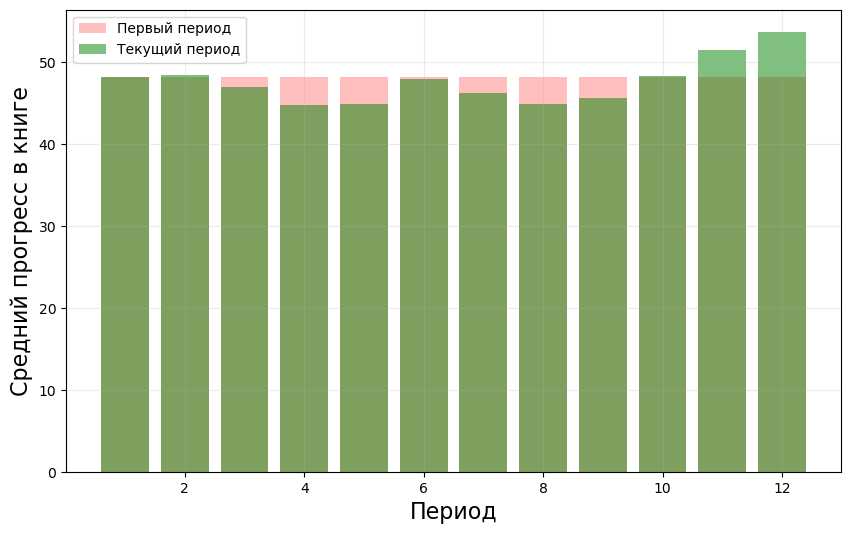

In [23]:
date = [i for i in range(1, 13)]

plt.figure(figsize=(10, 6))
plt.grid(alpha=0.25)

plt.bar(date, sm_plot_z, alpha=0.25, color='red')
plt.bar(date, sm_plot, alpha=0.5, color='green')

plt.legend(['Первый период','Текущий период'],loc=2)

plt.xlabel('Период', fontsize=16)
plt.ylabel('Средний прогресс в книге', fontsize=16)

plt.show()

### PSI

In [24]:
psi_pross = 0
el_psi_pross = np.array([])
for i in sm_pross:
    el_psi_pross = np.append(psi_pross, (i - sm_pross[0]) * np.log(i / sm_pross[0]))
psi_pross = el_psi_pross.sum()
print(f'PSI = {psi_pross:.5f}')

PSI = 0.00103


### PSI = 0.00103 < 0.05, что показывает отсутствие между периодами значимого изменения вовлеченности пользователей в чтение книг

## Дискретная метрика: Количество пользователей мужского пола, которые приобрели книгу в течение 2 месяцев
#### Вектор из долей мужского пола в течение каждых 2 месяцев (для расчета PSI)

In [25]:
sx = act.merge(users, on='user_id')
sm_sx = np.array([])
for srt, stp in zip(start_date, stop_date):
    data_sx = np.array(sx[(sx['start_date'] >= srt) & (sx['start_date'] <= stp)]['sex'].dropna())
    sm_sx = np.append(sm_sx, data_sx.sum())
sm_sx_plot = sm_sx.copy()
sm_sx_plot_z = [list(sm_sx_plot)[0] for i in range(12)]
sm_sx /= sm_sx.sum()
sm_sx = list(sm_sx)

### Распределение количества пользователей мужского пола по периодам

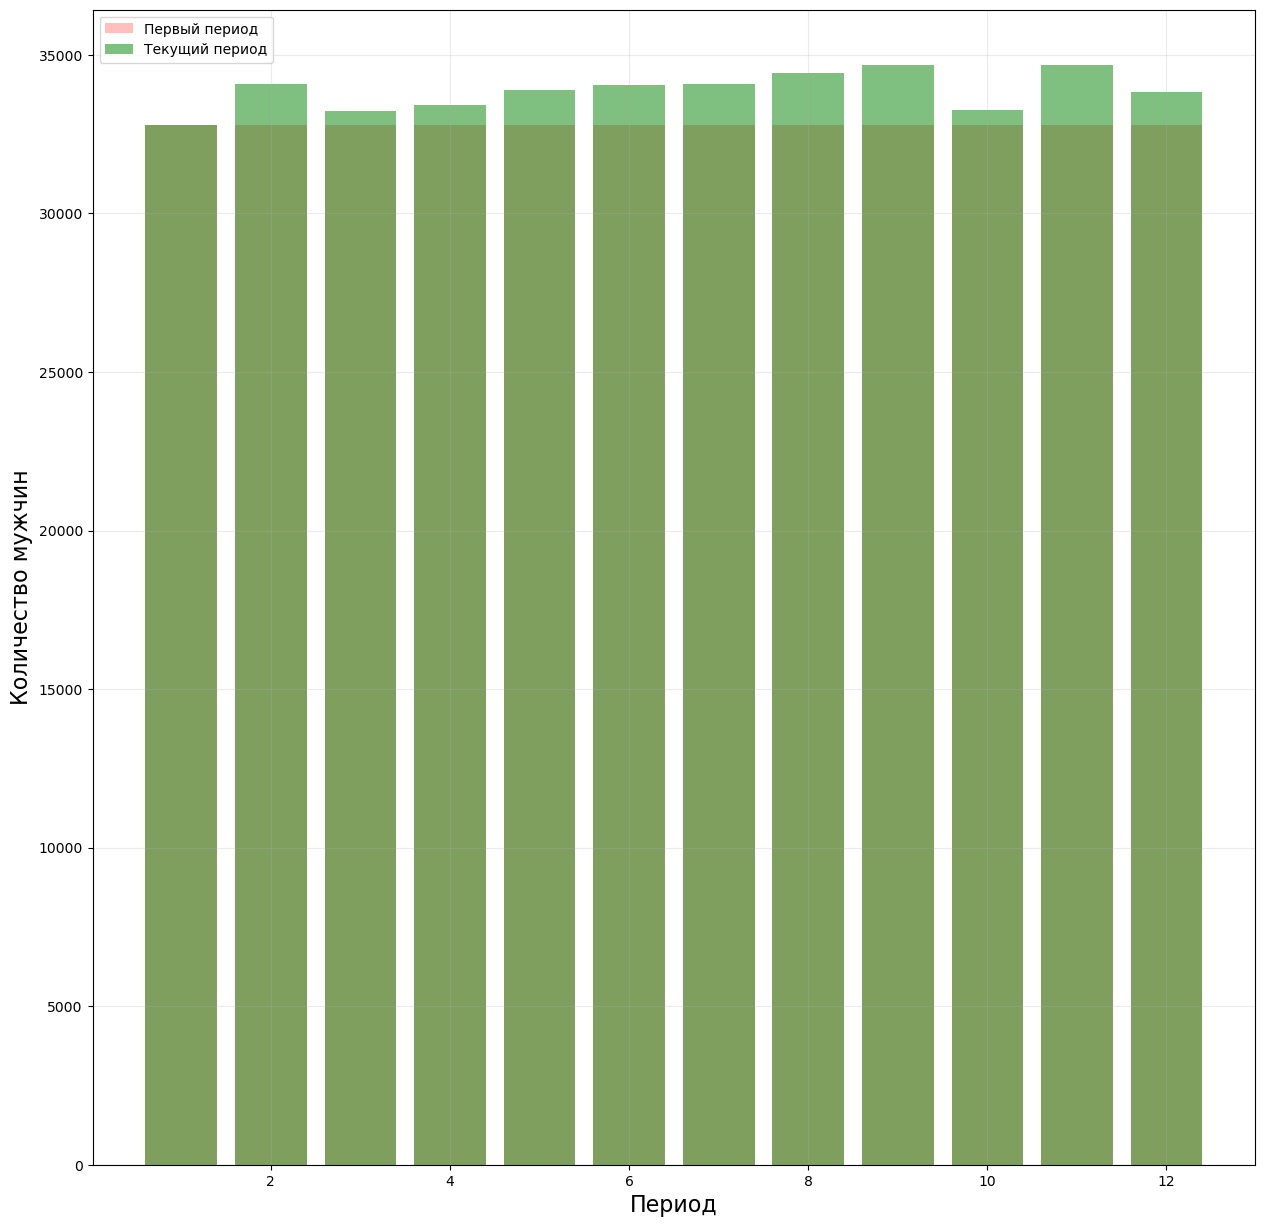

In [26]:
plt.figure(figsize=(15, 15))
plt.grid(alpha=0.25)

plt.bar(date, sm_sx_plot_z, alpha=0.25, color='red')
plt.bar(date, sm_sx_plot, alpha=0.5, color='green')

plt.legend(['Первый период','Текущий период'],loc=2)

plt.xlabel('Период', fontsize=16)
plt.ylabel('Количество мужчин', fontsize=16)

plt.show()

In [27]:
psi_sx = 0
el_psi_sx = np.array([])
for i in sm_sx:
    el_psi_sx = np.append(psi_sx, (i - sm_sx[0]) * np.log(i / sm_sx[0]))
psi_sx = el_psi_sx.sum()
print(f'PSI = {psi_sx:.5f}')

PSI = 0.00008


### PSI = 0.00008 < 0.05 показывает отсутствие значимого изменения количества пользователей мужского пола, а значит и женского пола между периодами